In [4]:
import import_ipynb
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from image_processing_functions import read_image, canny_edge_response, canny_edge_adapted, \
    automatic_canny_edge_response, harris_corner_response, hough_line_detect_response, \
    hough_line_intersections, houghp_line_detect_response, houghp_line_points


In [5]:
filename = 'C:/Users/liviu/Documents/FII Master II/Proiect disertatie/datasets/dataset 1/data/0.jpg'

# K-means clusterization of obtained data from Hough transform - clustering the obtained lines or their intersections?

{0: [[752, 1655, 1273, -1298]],
 1: [[-1511, -101, 1422, 522], [-1508, -83, 1445, 437]],
 2: [[-993, -1127, 1127, 993],
  [-989, -1131, 1131, 989],
  [-991, -1129, 1129, 991],
  [-994, -1126, 1126, 994]],
 3: [[204, 1586, 879, -1336],
  [189, 1593, 914, -1317],
  [221, 1580, 844, -1353]],
 4: [[-1596, 349, 1348, 922],
  [-1582, 279, 1362, 851],
  [-1580, 323, 1374, 844],
  [-1578, 316, 1375, 837]],
 5: [[450, 1615, 1022, -1329], [361, 1610, 984, -1324]],
 6: [[-1610, 421, 1334, 993],
  [-1624, 498, 1319, 1070],
  [-1630, 455, 1304, 1078]],
 7: [[-1542, 75, 1402, 647]],
 8: [[45, 1557, 771, -1353], [47, 1557, 773, -1353]],
 9: [[609, 1630, 1130, -1323]],
 10: [[131, 1569, 806, -1353],
  [135, 1570, 809, -1352],
  [111, 1573, 837, -1337],
  [114, 1574, 840, -1336]],
 11: [[-1555, 141, 1389, 714], [-1555, 182, 1399, 703]],
 12: [[-1529, 8, 1415, 580], [-1532, 50, 1422, 571]],
 13: [[-1639, 572, 1305, 1145]],
 14: [[-1519, -19, 1434, 501],
  [-1516, -60, 1428, 511],
  [-1516, -58, 1428, 51

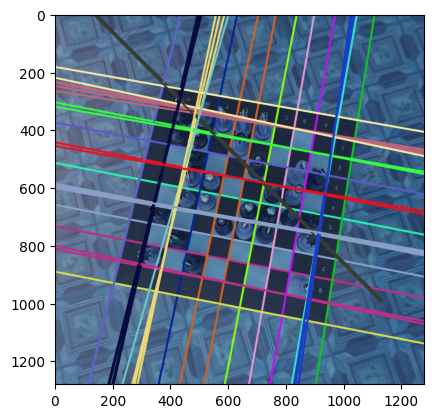

In [6]:
from sklearn.cluster import KMeans

def kmeans_cluster_lines(lines, n_clusters=22):

    # In k-means, we should know exactly the number of clusters
    # For detecting lines in chesssboard images, we have
    # 9x2 chess margins (horizontal and vertical) + 4 board margins = 22 groups of lines
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(lines)
    cluster_ids = kmeans.labels_
    unique_clusters = np.unique(cluster_ids)

    image_copy = cv.imread(filename)

    cluster_colors = {i: (np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255)) for i in unique_clusters}
    for line, cluster_id in zip(lines, cluster_ids):
        cv.line(image_copy, (line[0], line[1]), (line[2], line[3]), cluster_colors[cluster_id], 5)
    plt.imshow(image_copy)

    cluster_dict = {key: [] for key in unique_clusters}
    for i in range(len(cluster_ids)):
        cluster_dict[cluster_ids[i]].append(lines[i])

    return cluster_dict

lines = hough_line_detect_response(read_image(filename))
kmclusters = kmeans_cluster_lines(lines['coords'])
kmclusters

## Calculating the mean of these lines in order to obtain a single one

{0: (752.0, 1655.0, 1273.0, -1298.0),
 1: (-1509.5, -92.0, 1433.5, 479.5),
 2: (-991.75, -1128.25, 1128.25, 991.75),
 3: (204.66666666666666, 1586.3333333333333, 879.0, -1335.3333333333333),
 4: (-1584.0, 316.75, 1364.75, 863.5),
 5: (405.5, 1612.5, 1003.0, -1326.5),
 6: (-1621.3333333333333, 458.0, 1319.0, 1047.0),
 7: (-1542.0, 75.0, 1402.0, 647.0),
 8: (46.0, 1557.0, 772.0, -1353.0),
 9: (609.0, 1630.0, 1130.0, -1323.0),
 10: (122.75, 1571.5, 823.0, -1344.5),
 11: (-1555.0, 161.5, 1394.0, 708.5),
 12: (-1530.5, 29.0, 1418.5, 575.5),
 13: (-1639.0, 572.0, 1305.0, 1145.0),
 14: (-1518.25, -28.0, 1432.5, 504.75),
 15: (141.0, 1600.0, 968.0, -1282.0),
 16: (680.0, 1643.0, 1200.0, -1311.0),
 17: (843.0, 1652.0, 1313.0, -1310.0),
 18: (-1568.0, 210.0, 1375.0, 782.0),
 19: (779.3333333333334, 1635.6666666666667, 1231.6666666666667, -1329.0),
 20: (519.0, 1629.0, 1092.0, -1315.0),
 21: (291.0, 1595.0, 915.0, -1338.0)}

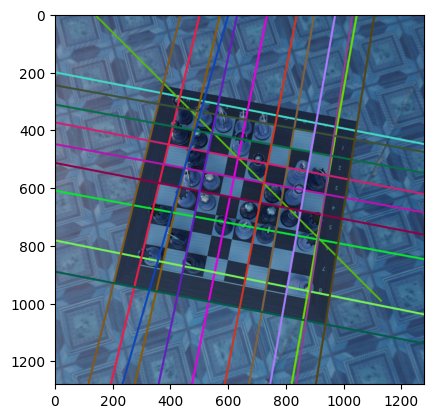

In [7]:
def augment_kmcluster_lines(cluster_dict):
    augmented_cluster = {key: (np.mean(np.array(values)[:, 0]), np.mean(np.array(values)[:, 1]), np.mean(np.array(values)[:, 2]), np.mean(np.array(values)[:, 3])) for key, values in cluster_dict.items() if values != []}

    image_copy = cv.imread(filename)
    cluster_colors = {i: (np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255)) for i in range(len(augmented_cluster))}
    for cluster_id, cluster_line in augmented_cluster.items():
        cv.line(image_copy, (round(cluster_line[0]), round(cluster_line[1])), (round(cluster_line[2]), round(cluster_line[3])), cluster_colors[cluster_id], 5)

    plt.imshow(image_copy)
    return augmented_cluster

augment_kmcluster_lines(kmclusters)

# K-means clusterization of intersections

{0: [[942.0, 558.0], [944.0, 558.0], [946.0, 559.0], [946.0, 559.0]],
 1: [[407.0, 674.0],
  [409.0, 666.0],
  [409.0, 667.0],
  [414.0, 675.0],
  [415.0, 668.0],
  [415.0, 668.0],
  [415.0, 675.0],
  [416.0, 668.0],
  [416.0, 668.0],
  [418.0, 676.0],
  [420.0, 668.0],
  [420.0, 669.0]],
 2: [[446.0, 315.0],
  [450.0, 315.0],
  [454.0, 323.0],
  [455.0, 317.0],
  [457.0, 325.0],
  [458.0, 323.0],
  [459.0, 317.0],
  [460.0, 326.0],
  [462.0, 330.0],
  [463.0, 324.0],
  [465.0, 327.0],
  [465.0, 331.0],
  [466.0, 325.0],
  [469.0, 327.0],
  [470.0, 332.0],
  [473.0, 341.0],
  [474.0, 332.0]],
 3: [[885.0, 907.0], [887.0, 907.0], [891.0, 908.0], [895.0, 909.0]],
 4: [[347.0, 881.0],
  [349.0, 876.0],
  [366.0, 885.0],
  [366.0, 885.0],
  [367.0, 880.0],
  [368.0, 880.0],
  [369.0, 886.0],
  [370.0, 880.0]],
 5: [[736.0, 518.0]],
 6: [[1174.0, 1042.0],
  [1177.0, 1043.0],
  [1182.0, 1044.0],
  [1185.0, 1053.0],
  [1186.0, 1044.0],
  [1188.0, 1054.0],
  [1194.0, 1055.0],
  [1197.0, 1056.0

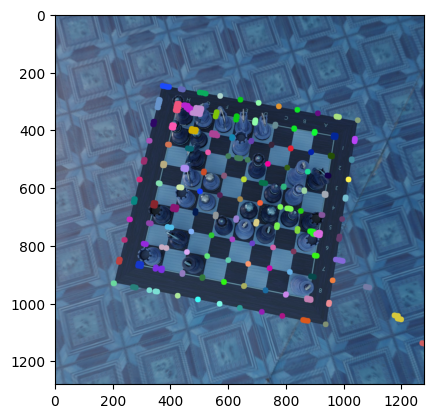

In [8]:
# k-means for line intersection points - this includes intersections of chessboard lines with the table margins
# In this case we would have 11x11 cluster points = 121 clusters

def kmeans_cluster_points(points, n_clusters=121):
    # distances = pdist(points, metric='euclidean')
    # links = linkage(distances, method='ward')
    # clusters = fcluster(links, 15, criterion='distance')
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(points)
    cluster_ids = kmeans.labels_
    unique_clusters = np.unique(cluster_ids)

    image_copy = cv.imread(filename)
    # image_copy = cv.cvtColor(image_copy, cv.COLOR_BGR2RGB)
    cluster_colors = {i: (np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255)) for i in unique_clusters}
    for point, cluster_id in zip(points, cluster_ids):
        cv.circle(image_copy, (round(point[0]), round(point[1])), 10, cluster_colors[cluster_id], -1)

    plt.imshow(image_copy)

    cluster_dict = {key: [] for key in unique_clusters}
    for i in range(len(cluster_ids)):
        cluster_dict[cluster_ids[i]].append(points[i])

    return cluster_dict

inters = hough_line_intersections(read_image(filename))
kmpoints = kmeans_cluster_points(inters['list'])
kmpoints

## Transforming the clusters of points into a single one

{0: (944.5, 558.5),
 1: (414.5, 670.1667),
 2: (461.52942, 325.29413),
 3: (889.5, 907.75),
 4: (362.75, 881.625),
 5: (736.0, 518.0),
 6: (1185.375, 1048.875),
 7: (911.5, 761.2857),
 8: (966.4, 422.15),
 9: (629.5, 347.83334),
 10: (653.5, 940.5),
 11: (392.5, 451.25),
 12: (327.25, 723.75),
 13: (640.0, 640.0),
 14: (828.8333, 385.16666),
 15: (767.3333, 734.3333),
 16: (448.0, 533.625),
 17: (273.75, 944.75),
 18: (550.1, 415.1),
 19: (947.5, 1000.5),
 20: (292.0, 572.0),
 21: (1081.0, 944.5),
 22: (358.2, 308.2),
 23: (509.5, 911.5),
 24: (626.3333, 709.0),
 25: (985.2, 851.8),
 26: (721.0, 584.2),
 27: (865.5, 1059.5),
 28: (342.91666, 657.0833),
 29: (309.75, 795.0),
 30: (877.0, 986.125),
 31: (485.66666, 683.3333),
 32: (634.0, 498.0),
 33: (480.25, 402.125),
 34: (934.625, 623.75),
 35: (382.83334, 250.33333),
 36: (494.52173, 335.13043),
 37: (222.0, 853.0),
 38: (1275.75, 1139.5),
 39: (375.75, 520.25),
 40: (900.75, 835.5),
 41: (850.0, 681.0),
 42: (897.6, 409.2),
 43: (9

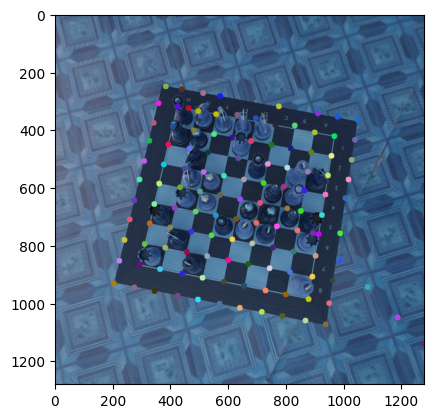

In [9]:
def augment_kmcluster_points(cluster_dict):
    augmented_cluster = {key: (np.mean(np.array(values)[:, 0]), np.mean(np.array(values)[:, 1])) for key, values in cluster_dict.items() if values != []}

    image_copy = cv.imread(filename)
    cluster_colors = {i: (np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255)) for i in range(len(augmented_cluster))}
    for cluster_id, cluster_point in augmented_cluster.items():
        cv.circle(image_copy, (round(cluster_point[0]), round(cluster_point[1])), 10, cluster_colors[cluster_id], -1)

    plt.imshow(image_copy)
    return augmented_cluster

augment_kmcluster_points(kmpoints)

# K-means clusterization of lines from HoughLinesP()

{0: [[424, 972, 570, 283],
  [367, 880, 508, 272],
  [365, 884, 507, 271],
  [369, 878, 499, 315],
  [425, 973, 563, 323]],
 1: [[357, 303, 963, 420],
  [356, 304, 837, 397],
  [410, 317, 968, 425],
  [410, 331, 1036, 430]],
 2: [[936, 1075, 1037, 432],
  [866, 1061, 977, 358],
  [863, 1061, 974, 358],
  [861, 1061, 973, 357]],
 3: [[241, 781, 961, 921], [240, 783, 961, 923], [292, 867, 950, 995]],
 4: [[569, 1002, 704, 308],
  [509, 913, 640, 296],
  [493, 986, 639, 296],
  [511, 908, 641, 296]],
 5: [[383, 249, 974, 840],
  [389, 250, 946, 807],
  [391, 250, 946, 805],
  [380, 248, 944, 812],
  [418, 255, 909, 763]],
 6: [[205, 927, 256, 720]],
 7: [[308, 504, 1004, 639], [380, 519, 865, 613], [461, 463, 942, 557]],
 8: [[222, 857, 616, 934], [206, 929, 474, 982]],
 9: [[860, 337, 1043, 370]],
 10: [[253, 728, 320, 456]],
 11: [[786, 1045, 909, 346], [881, 968, 978, 358], [798, 967, 908, 345]],
 12: [[532, 918, 949, 1000], [668, 1022, 937, 1075]],
 13: [[943, 1035, 990, 735]],
 14: [

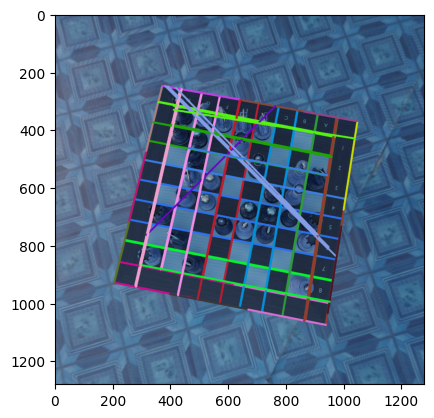

In [16]:
def houghp_kmeans_cluster_lines(img, n_clusters):
    houghp_lines = houghp_line_detect_response(img, threshold=90, minLineLength=100, maxLineGap=150)
    list_of_lines = []
    for line_list in houghp_lines['list'].tolist():
        list_of_lines.append(line_list.pop())
    return kmeans_cluster_lines(list_of_lines, n_clusters)

houghp_kmeans_cluster_lines(read_image(filename), 24)

{0: (337.3333333333333, 487.0, 935.6666666666666, 603.3333333333334),
 1: (432.875, 924.25, 570.875, 294.0),
 2: (936.0, 1075.0, 1037.0, 432.0),
 3: (257.6666666666667,
  810.3333333333334,
  957.3333333333334,
  946.3333333333334),
 4: (205.0, 927.0, 256.0, 720.0),
 5: (648.0, 298.0, 899.0, 343.0),
 6: (392.2, 250.4, 943.8, 805.4),
 7: (282.0, 923.75, 434.25, 264.0),
 8: (655.4, 1019.0, 785.6, 323.0),
 9: (383.25, 313.75, 951.0, 418.0),
 10: (315.0, 473.0, 371.0, 247.0),
 11: (214.0, 893.0, 545.0, 958.0),
 12: (998.0, 677.0, 1045.0, 375.0),
 13: (600.0, 970.0, 943.0, 1037.5),
 14: (274.6666666666667, 641.0, 983.0, 778.3333333333334),
 15: (370.0, 248.0, 642.0, 296.0),
 16: (792.0, 1006.0, 908.5, 345.5),
 17: (860.0, 337.0, 1043.0, 370.0),
 18: (253.0, 728.0, 320.0, 456.0),
 19: (943.0, 1035.0, 990.0, 735.0),
 20: (316.0, 764.0, 762.0, 318.0),
 21: (397.0, 968.0, 693.0, 1026.0),
 22: (400.2, 397.2, 925.4, 499.4),
 23: (867.75, 1037.75, 975.5, 357.75)}

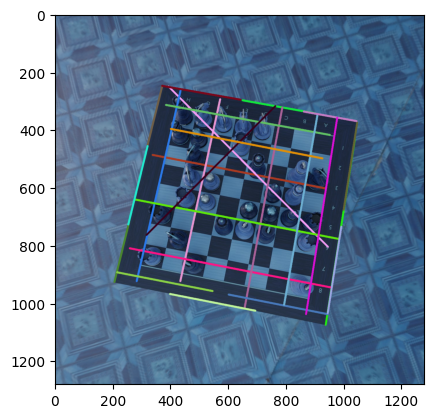

In [17]:
houghp_kmeans = houghp_kmeans_cluster_lines(read_image(filename), 24)
augment_kmcluster_lines(houghp_kmeans)

# K-means clusterization of coordinate points of lines obtained from HoughLinesP()

{0: [[410, 331]],
 1: [[668, 1022]],
 2: [[942, 557]],
 3: [[365, 884]],
 4: [[961, 923]],
 5: [[704, 308]],
 6: [[909, 346]],
 7: [[946, 805]],
 8: [[258, 711]],
 9: [[863, 1061]],
 10: [[280, 943]],
 11: [[308, 504]],
 12: [[1037, 432]],
 13: [[509, 913]],
 14: [[994, 708]],
 15: [[936, 1075], [937, 1075]],
 16: [[508, 272]],
 17: [[474, 982]],
 18: [[434, 258]],
 19: [[860, 337]],
 20: [[977, 358]],
 21: [[894, 479]],
 22: [[400, 384]],
 23: [[357, 303]],
 24: [[292, 867]],
 25: [[370, 248]],
 26: [[206, 929]],
 27: [[798, 967]],
 28: [[639, 296]],
 29: [[569, 1002]],
 30: [[773, 321]],
 31: [[240, 783]],
 32: [[397, 968]],
 33: [[949, 1000]],
 34: [[461, 463]],
 35: [[963, 420]],
 36: [[570, 283]],
 37: [[1045, 375]],
 38: [[291, 572]],
 39: [[951, 489]],
 40: [[865, 613]],
 41: [[616, 934]],
 42: [[320, 456]],
 43: [[786, 1045]],
 44: [[881, 968]],
 45: [[222, 857]],
 46: [[1004, 639]],
 47: [[316, 764]],
 48: [[275, 640]],
 49: [[837, 397]],
 50: [[380, 519]],
 51: [[716, 1031]],

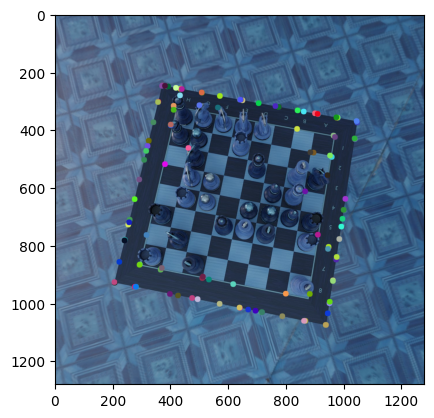

In [20]:
def houghp_kmeans_cluster_points(img):
    point_list = houghp_line_points(img)
    return kmeans_cluster_points(point_list['list'])

kmpointsp = houghp_kmeans_cluster_points(read_image(filename))
kmpointsp

{0: (410.0, 331.0),
 1: (668.0, 1022.0),
 2: (942.0, 557.0),
 3: (365.0, 884.0),
 4: (961.0, 923.0),
 5: (704.0, 308.0),
 6: (909.0, 346.0),
 7: (946.0, 805.0),
 8: (258.0, 711.0),
 9: (863.0, 1061.0),
 10: (280.0, 943.0),
 11: (308.0, 504.0),
 12: (1037.0, 432.0),
 13: (509.0, 913.0),
 14: (994.0, 708.0),
 15: (936.5, 1075.0),
 16: (508.0, 272.0),
 17: (474.0, 982.0),
 18: (434.0, 258.0),
 19: (860.0, 337.0),
 20: (977.0, 358.0),
 21: (894.0, 479.0),
 22: (400.0, 384.0),
 23: (357.0, 303.0),
 24: (292.0, 867.0),
 25: (370.0, 248.0),
 26: (206.0, 929.0),
 27: (798.0, 967.0),
 28: (639.0, 296.0),
 29: (569.0, 1002.0),
 30: (773.0, 321.0),
 31: (240.0, 783.0),
 32: (397.0, 968.0),
 33: (949.0, 1000.0),
 34: (461.0, 463.0),
 35: (963.0, 420.0),
 36: (570.0, 283.0),
 37: (1045.0, 375.0),
 38: (291.0, 572.0),
 39: (951.0, 489.0),
 40: (865.0, 613.0),
 41: (616.0, 934.0),
 42: (320.0, 456.0),
 43: (786.0, 1045.0),
 44: (881.0, 968.0),
 45: (222.0, 857.0),
 46: (1004.0, 639.0),
 47: (316.0, 7

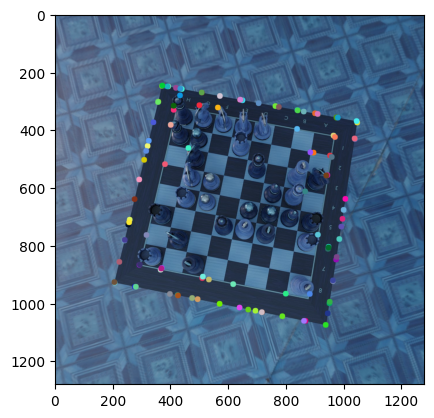

In [21]:
augment_kmcluster_points(kmpointsp)